#### Download the dataset from https://www.kaggle.com/competitions/dogs-vs-cats/data

#### Extract the dogs-vs-cats.zip in the same folder as this notebook

In [1]:
import os
import re
import shutil
import random



# The root directory of the project.
root_dir = 'E:\\Projects\\Dogs vs Cats Classifier'


source_dir = os.path.join(root_dir, 'dogs-vs-cats\\train\\train')

In [2]:
# Creating the structured directory path for imagedatagenerator
data_dir = os.path.join(root_dir,'data')
os.makedirs(data_dir, exist_ok = True)

training_dir = os.path.join(data_dir, 'training')
os.makedirs(training_dir, exist_ok = True)

validation_dir = os.path.join(data_dir, 'validation')
os.makedirs(validation_dir, exist_ok = True)

training_cats_dir = os.path.join(training_dir, "cats")
os.makedirs(training_cats_dir, exist_ok = True)

training_dogs_dir = os.path.join(training_dir, "dogs")
os.makedirs(training_dogs_dir, exist_ok = True)

validation_cats_dir = os.path.join(validation_dir, "cats")
os.makedirs(validation_cats_dir, exist_ok = True)

validation_dogs_dir = os.path.join(validation_dir, "dogs")
os.makedirs(validation_dogs_dir, exist_ok = True)

In [3]:
# Checking the directories created
for rootdir, dirs, files in os.walk(data_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

E:\Projects\Dogs vs Cats Classifier\data\training
E:\Projects\Dogs vs Cats Classifier\data\validation
E:\Projects\Dogs vs Cats Classifier\data\training\cats
E:\Projects\Dogs vs Cats Classifier\data\training\dogs
E:\Projects\Dogs vs Cats Classifier\data\validation\cats
E:\Projects\Dogs vs Cats Classifier\data\validation\dogs


In [4]:
source_files = os.listdir(source_dir)

In [5]:
# Make cats and dogs folder inside the source folder
source_cats_dir = os.path.join(source_dir, "cats")
os.makedirs(source_cats_dir, exist_ok = True)

source_dogs_dir = os.path.join(source_dir, "dogs")
os.makedirs(source_dogs_dir, exist_ok = True)

In [6]:
# Function to check if image is of cat or dog using its name
def is_cat_image(input_string):
    pattern = r'^cat'
    if re.match(pattern, input_string):
        return True
    else:
        return False

In [7]:
# Move the images into cats and dogs folder inside the source folder
for file in source_files:
    if is_cat_image(file) == True:
        source = os.path.join(source_dir, file)
        destination = os.path.join(source_cats_dir, file)
        shutil.move(source, destination)
    else:
        source = os.path.join(source_dir, file)
        destination = os.path.join(source_dogs_dir, file)

        shutil.move(source, destination)

In [8]:
# Function to copy images to training and validation directories
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
    files = os.listdir(SOURCE_DIR)

    for file in files:
        if os.path.getsize(os.path.join(SOURCE_DIR, file)) > 0:
            continue
        else:
            files.remove(file)
            print(f"{file} is zero length, so ignoring.")

    random.sample(files, len(files))

    split_index = int(SPLIT_SIZE * len(files))

    # Split the files into training and validation sets
    training_files = files[:split_index]
    validation_files = files[split_index:]

    # Copy training files
    for file in training_files:
        source = os.path.join(SOURCE_DIR, file)
        destination = os.path.join(TRAINING_DIR, file)
        shutil.copyfile(source, destination)

    # Copy validation files
    for file in validation_files:
        source = os.path.join(SOURCE_DIR, file)
        destination = os.path.join(VALIDATION_DIR, file)
        shutil.copyfile(source, destination)

In [9]:
source_cats_dir = os.path.join(source_dir, "cats")
source_dogs_dir = os.path.join(source_dir, "dogs")

# Defining proportion of images used for training
split_size = 0.8

# Running the function
split_data(source_cats_dir, training_cats_dir, validation_cats_dir, split_size)
split_data(source_dogs_dir, training_dogs_dir, validation_dogs_dir, split_size)

In [10]:
# Checking that the number of images matches the expected output
print(f"\n\nOriginal cat's directory has {len(os.listdir(source_cats_dir))} images")
print(f"Original dog's directory has {len(os.listdir(source_dogs_dir))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(training_cats_dir))} images of cats for training")
print(f"There are {len(os.listdir(training_dogs_dir))} images of dogs for training")
print(f"There are {len(os.listdir(validation_cats_dir))} images of cats for validation")
print(f"There are {len(os.listdir(validation_dogs_dir))} images of dogs for validation")



Original cat's directory has 12500 images
Original dog's directory has 12500 images

There are 10000 images of cats for training
There are 10000 images of dogs for training
There are 2500 images of cats for validation
There are 2500 images of dogs for validation


In [12]:
# Using the ImageDataGenerator to load the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Adding data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 45,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Augmentation not used in validation
validation_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 100 using train_datagen generator
train_generator = train_datagen.flow_from_directory(training_dir,
                                                    batch_size = 100,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 25 using validation_datagen generator
validation_generator =  validation_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 25,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [17]:
# Download the pre-trained weights of InceptionV3 Model.
import urllib.request

url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
file_name = "inception_v3_weights.h5"
download_path = root_dir

file_path = os.path.join(download_path, file_name)

urllib.request.urlretrieve(url, file_path)


('E:\\Projects\\Dogs vs Cats Classifier\\inception_v3_weights.h5',
 <http.client.HTTPMessage at 0x1b86604dd10>)

In [18]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

# Set the weights file
weights_file = 'inception_v3_weights.h5'

# Initialize the base model.
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

In [20]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

 batch_normalization_10 (BatchN  (None, 16, 16, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 16, 16, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 conv2d_20 (Conv2D)             (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 16, 16, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 16, 16, 48)  144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 16, 16, 96)  288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_34 (Conv2D)             (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 7, 7, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 7, 7, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 7, 7, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 7, 7, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41

 batch_normalization_55 (BatchN  (None, 7, 7, 160)   480         ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 7, 7, 160)   480         ['conv2d_51[0][0]']              
 ormalizat

 conv2d_61 (Conv2D)             (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 7, 7, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 7, 7, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 7, 7, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 7, 7, 192)   576         ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 3, 3, 320)    552960      ['activation_70[0][0]']          
          

                                                                                                  
 activation_82 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 3, 3, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 mixed9_0 

 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 3, 3, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 3, 3, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activatio

In [21]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [22]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense  (1, activation='sigmoid')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

 batch_normalization_10 (BatchN  (None, 16, 16, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 16, 16, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 conv2d_20 (Conv2D)             (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 16, 16, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 16, 16, 48)  144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 16, 16, 96)  288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_34 (Conv2D)             (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 7, 7, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 7, 7, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 7, 7, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 7, 7, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41

 batch_normalization_55 (BatchN  (None, 7, 7, 160)   480         ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 7, 7, 160)   480         ['conv2d_51[0][0]']              
 ormalizat

 conv2d_61 (Conv2D)             (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 7, 7, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 7, 7, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 7, 7, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

In [25]:
# Set the training parameters
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [26]:
# Train the model.
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            epochs = 20,
            verbose = 2)

Epoch 1/20
200/200 - 1148s - loss: 0.3652 - accuracy: 0.9082 - val_loss: 0.0765 - val_accuracy: 0.9702 - 1148s/epoch - 6s/step
Epoch 2/20
200/200 - 589s - loss: 0.1647 - accuracy: 0.9317 - val_loss: 0.0783 - val_accuracy: 0.9718 - 589s/epoch - 3s/step
Epoch 3/20
200/200 - 614s - loss: 0.1425 - accuracy: 0.9404 - val_loss: 0.0701 - val_accuracy: 0.9734 - 614s/epoch - 3s/step
Epoch 4/20
200/200 - 464s - loss: 0.1418 - accuracy: 0.9395 - val_loss: 0.0698 - val_accuracy: 0.9742 - 464s/epoch - 2s/step
Epoch 5/20
200/200 - 394s - loss: 0.1322 - accuracy: 0.9435 - val_loss: 0.0708 - val_accuracy: 0.9742 - 394s/epoch - 2s/step
Epoch 6/20
200/200 - 585s - loss: 0.1296 - accuracy: 0.9446 - val_loss: 0.0693 - val_accuracy: 0.9744 - 585s/epoch - 3s/step
Epoch 7/20
200/200 - 385s - loss: 0.1310 - accuracy: 0.9473 - val_loss: 0.0694 - val_accuracy: 0.9728 - 385s/epoch - 2s/step
Epoch 8/20
200/200 - 380s - loss: 0.1233 - accuracy: 0.9509 - val_loss: 0.0691 - val_accuracy: 0.9724 - 380s/epoch - 2s/ste

In [27]:
model.save("model.h5")

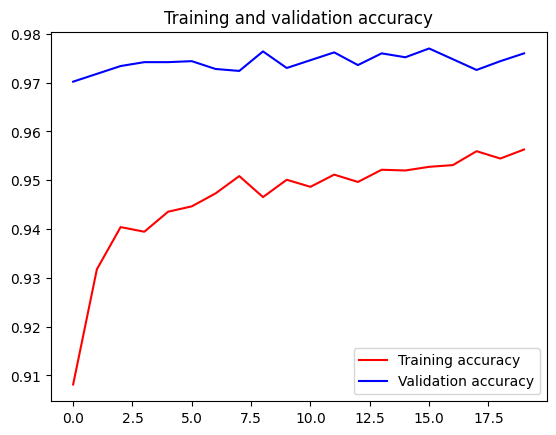

In [31]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
#plt.figure()
plt.savefig('plot.jpg', format="jpg")
plt.show()